<a href="https://colab.research.google.com/github/Preteka/Deep-Learning-Lab/blob/main/dl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0097 - loss: -4.3612 - val_accuracy: 0.0036 - val_loss: -24.9716
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0062 - loss: -37.8016 - val_accuracy: 0.0036 - val_loss: -96.6506
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0078 - loss: -132.8410 - val_accuracy: 0.0036 - val_loss: -277.5059
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0107 - loss: -353.6480 - val_accuracy: 0.0036 - val_loss: -646.9138
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0079 - loss: -785.2292 - val_accuracy: 0.0036 - val_loss: -1305.2982
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0061 - loss: -1558.3005 - val_accuracy: 0.0036 - val_loss: -2350.8306
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0076 - loss: -2757.0100 - val_accuracy: 0.0036 - val_loss: -3904.6670
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0094 - loss: -4414.6729

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


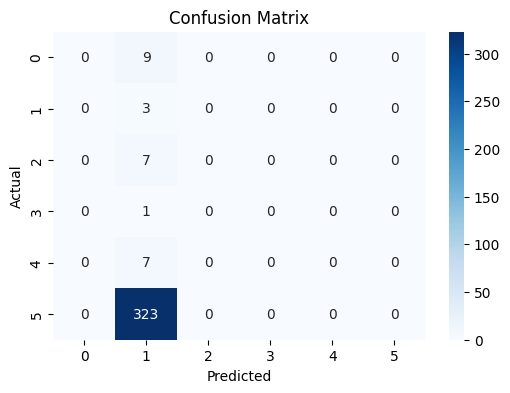

In [8]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")
print("✅ Dataset loaded successfully!\n")
print(df.head())

# Step 3: Drop columns not useful
df = df.drop(columns=[
    "ORDERNUMBER","ADDRESSLINE1","ADDRESSLINE2","CITY",
    "STATE","POSTALCODE","CONTACTLASTNAME","CONTACTFIRSTNAME"
], errors="ignore")

# Step 4: Convert ORDERDATE to datetime features
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors="coerce")
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month
df["DAY"] = df["ORDERDATE"].dt.day
df = df.drop(columns=["ORDERDATE"])

# Step 5: Handle missing values
df = df.dropna()

# Step 6: Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 7: Define features and target
X = df.drop(columns=["STATUS"])   # Features
y = df["STATUS"]                  # Target

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 9: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 10: Build Neural Network model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 11: Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Step 12: Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Step 13: Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {acc * 100:.2f}%")

# Step 14: Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 15: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
